# Assignment 1
This assignment has two questions:
 - Q1: Probability
 - Q2: Linear Regression

Utilize the designated cell within this notebook to complete the exercises. As for the Python exercises:
- Refrain from altering the provided code; simply fill in the missing portions as indicated.
- Do not use any additional libraries beyond those already included in the code (e.g., NumPy and Matplotlib library).
- Make sure that the output of all code cells is visible in your submitted notebook. **The evaluator is NOT expected to execute your code before grading your submission.**
   
Please identify the authors of this assignment in the cell below.

# **Identification**

* **Name:** Pedro Lima
* **Student Number:** 202401143

* **Name:** Nelson Lorenzoni
* **Student Number:** 201800067


---


**Note:** This work is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.
To generate the pdf file we have first to covert the notebook to html using the command `!jupyter nbconvert --to html "ML_project2.ipynb"`, then open the html file and printout to PDF.

## 1. Probability exercise
A city has 3 RADARs (𝐴,
𝐵, and
𝐶) in different locations to detect aerial threats.  These sensors have a stochastic detection capability as a function of range coordinates **x=**$(x_1, x_2)$, which can be modeled by a 2D Gaussian distribution $N (\mu, \Sigma)$. Any moving object appearing in the air will generate a footprint area in the detection range  of each RADAR that is used to estimate the probability of that threat be properly detected:
Each RADAR has a particular stochastic model:
 - 𝐴 is unknown but there is a dataset available;
 - 𝐵 is unknown but there is a dataset available;
 - 𝐶 is described below:

\begin{align}
\mu_C = \begin{pmatrix}
1.5 \\
1.5  
\end{pmatrix},
\end{align}

\begin{align}
\Sigma_C = \begin{pmatrix}
0.5 & 0.0 \\
0.0 & 0.5
\end{pmatrix}.
\end{align}

𝐴, 𝐵 and 𝐶 have independent sensing capabilities.

In [16]:
# Load libraries that you are allowed to use
import numpy as np
import matplotlib.pyplot as plt

a)  **characterize the detection capability of RADARs 𝐴 and 𝐵, by writing the formulas for the parameter estimates and probability density functions of each distribution.**

First, indicate all mathematical expressions that are needed to solve this exercise and then, implement the solution in Python.


Tip: use the [Latex syntaxe](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/main/lessons/00/intro_to_latex.ipynb#scrollTo=QOEFZmw4Z1GJ) to show the mathematical expessions.

*----- Response*

RADAR A (same for RADAR B):

Mean estimate:

$\mu_A =
\begin{pmatrix}
\frac{1}{n} \sum_{i=1}^{n} x_1\\ \\
\frac{1}{n} \sum_{i=1}^{n} x_2
\end{pmatrix}$
, where $n$ represents the number of observations

\\

Covariance matrix estimate:

$\sum_A =
\begin{pmatrix}
\frac{1}{n-1} \sum_{i=1}^{n} (x_1 - \mu_{x_1}) (x_1 - \mu_{x_1})^T & \frac{1}{n-1} \sum_{i=1}^{n} (x_1 - \mu_{x_1}) (x_2 - \mu_{x_2})^T\\ \\
\frac{1}{n-1} \sum_{i=1}^{n} (x_2 - \mu_{x_2}) (x_1 - \mu_{x_1})^T & \frac{1}{n-1} \sum_{i=1}^{n} (x_2 - \mu_{x_2}) (x_2 - \mu_{x_2})^T
\end{pmatrix}$
, where $n$ represents the number of observations

\\

Probability density function:

$f_A(x) = \frac{1}{2\pi \sqrt{|\Sigma_A|}} \exp\left(-\frac{1}{2}(x - \mu_A)^T \Sigma_A^{-1} (x - \mu_A)\right)$

In [86]:
from google.colab import drive
drive.mount('/content/drive')
import os
data_path = os.path.join('/content/drive', 'My Drive', 'Colab_Notebooks', 'ML_Assign1_Data')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# Load data files using the constructed path
X_A = np.loadtxt(os.path.join(data_path, "ml_dataset_q1_A"), delimiter=' ')
X_B = np.loadtxt(os.path.join(data_path, "ml_dataset_q1_B"), delimiter=' ')

In [88]:
######################## RADAR A

## mean
mean_A = np.sum(X_A, axis=0) / len(X_A)

## covariance
centered_x1 = X_A[:, 0] - mean_A[0]
centered_x2 = X_A[:, 1] - mean_A[1]
cov_x1x1 = np.sum(centered_x1 ** 2) / (len(X_A)-1)  # variance of x1
cov_x1x2 = np.sum(centered_x1 * centered_x2) / (len(X_A)-1)  # covariance of x1 and x2
cov_x2x2 = np.sum(centered_x2 ** 2) / (len(X_A)-1)  # variance of x2

cov_A = np.array([[cov_x1x1, cov_x1x2],
                  [cov_x1x2, cov_x2x2]])

######################## RADAR B

## mean
mean_B = np.sum(X_B, axis=0) / len(X_B)

## covariance
centered_x1 = X_B[:, 0] - mean_B[0]
centered_x2 = X_B[:, 1] - mean_B[1]
cov_x1x1 = np.sum(centered_x1 ** 2) / (len(X_B)-1)  # variance of x1
cov_x1x2 = np.sum(centered_x1 * centered_x2) / (len(X_B)-1)  # covariance of x1 and x2
cov_x2x2 = np.sum(centered_x2 ** 2) / (len(X_B)-1)  # variance of x2

cov_B = np.array([[cov_x1x1, cov_x1x2],
                  [cov_x1x2, cov_x2x2]])

print("mean A = ", mean_A)
print("Cov A  = ", cov_A, "\n\r")
print("mean B = ", mean_B)
print("Cov B  = ", cov_B, "\n\r")


######################## probability density function
def calculate_pdf(x, mean, covariance):

  det_covariance = np.linalg.det(covariance)

  if det_covariance == 0:
    raise ValueError("covariance matrix is not invertible")
  else:
    # exponent term
    inv_covariance = np.linalg.inv(covariance)
    diff = x - mean
    exponent = -0.5 * (diff.T @ inv_covariance @ diff)

    # calculate pdf
    return np.exp(exponent) / (2 * np.pi * np.sqrt(det_covariance))

mean A =  [0.89750403 1.30273791]
Cov A  =  [[0.98466546 0.26778636]
 [0.26778636 1.30541953]] 

mean B =  [2.31641946 2.31896158]
Cov B  =  [[ 0.95273342 -0.28039522]
 [-0.28039522  1.39752779]] 





b) **Calculate the probability density of a potential threat at grid coordinate (1.5, 1.5) be detected by 𝐴. Repeat for 𝐵.** Implement the solution in Python.

In [89]:
x = np.array([1.5, 1.5])

p_A_when_x = calculate_pdf(x, mean_A, cov_A)
p_B_when_x = calculate_pdf(x, mean_B, cov_B)

print("pdf(A = (1.5 1.5) ) =", p_A_when_x)
print("pdf(B = (1.5 1.5) ) =", p_B_when_x)

pdf(A = (1.5 1.5) ) = 0.12009279037403764
pdf(B = (1.5 1.5) ) = 0.06541517433450952


c) **What is the probability density of a threat in coordinate (1.9, 2.1) be detected by all city's RADARs ?** Implement the solution in Python. Plot the contour curves of the detection profile for each RADAR and for a threat being detected by all RADARs.

In [90]:
threat_location = np.array([1.9, 2.1])

# parameters for RADAR C
mean_C = np.array([1.5, 1.5])
cov_C = np.array([[0.5, 0.0], [0.0, 0.5]])

# individual PDFs
p_A_when_x = calculate_pdf(threat_location, mean_A, cov_A)
p_B_when_x = calculate_pdf(threat_location, mean_B, cov_B)
p_C_when_x = calculate_pdf(threat_location, mean_C, cov_C)

# combined probability density (assuming independence)
p_x_A_B_C = p_A_when_x * p_B_when_x * p_C_when_x

print("pdf(A = (1.9 2.1) ) =", p_A_when_x)
print("pdf(B = (1.9 2.1) ) =", p_B_when_x)
print("pdf(C = (1.9 2.1) ) =", p_C_when_x)
print("pdf(A, B, C) =", p_x_A_B_C)


pdf(A = (1.9 2.1) ) = 0.077561571591187
pdf(B = (1.9 2.1) ) = 0.12419049167630523
pdf(C = (1.9 2.1) ) = 0.18924176795831743
pdf(A, B, C) = 0.00182285424342676


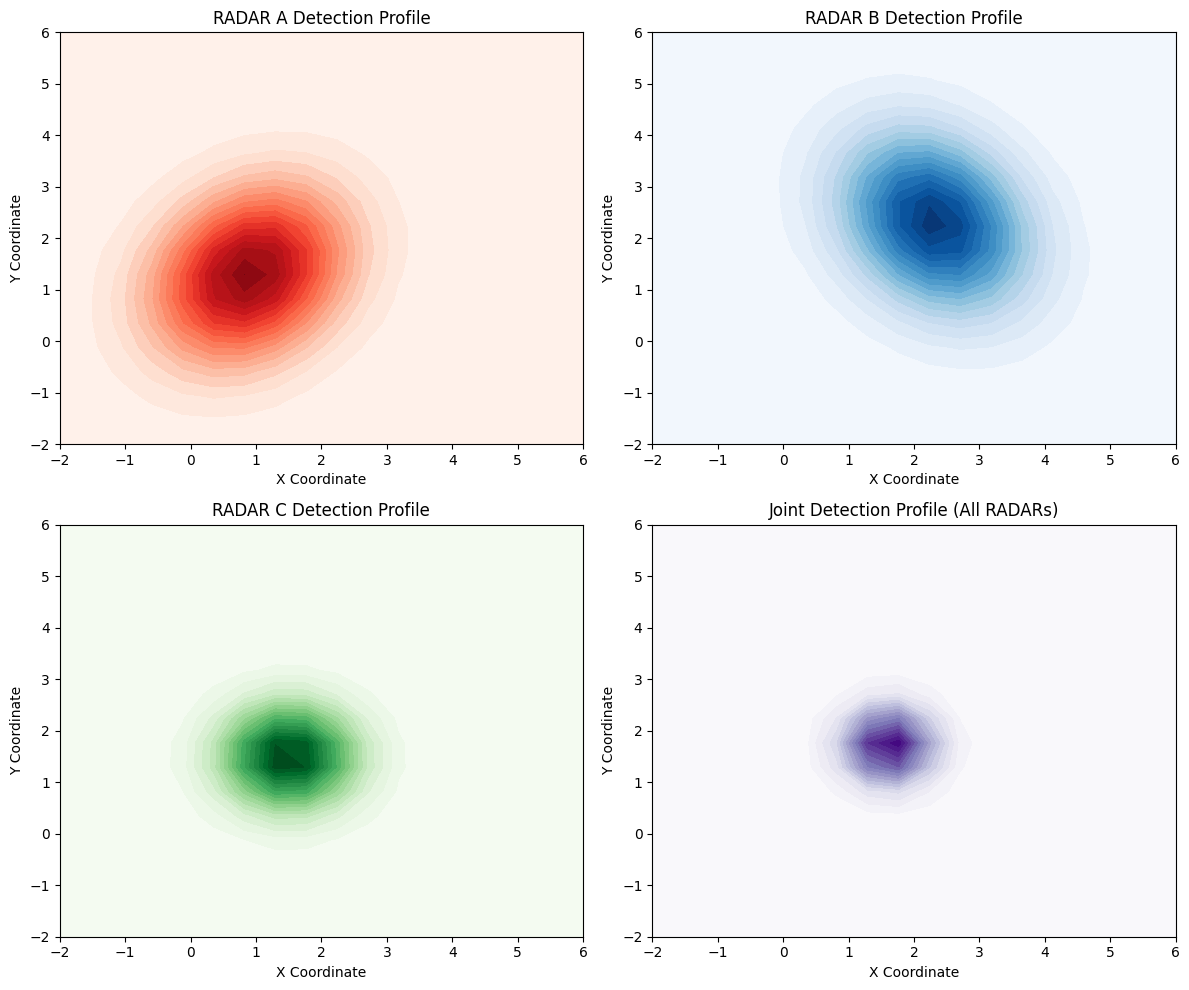

In [96]:
# Create a grid of points
x_range        = np.linspace(-2, 6, 18)
y_range        = np.linspace(-2, 6, 18)
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Compute the probability densities over the grid for each RADAR
pdf_A = np.array([[calculate_pdf(np.array([x, y]), mean_A, cov_A) for x in x_range] for y in y_range])
pdf_B = np.array([[calculate_pdf(np.array([x, y]), mean_B, cov_B) for x in x_range] for y in y_range])
pdf_C = np.array([[calculate_pdf(np.array([x, y]), mean_C, cov_C) for x in x_range] for y in y_range])

# Compute the joint probability density grid
joint_pdf_grid = pdf_A * pdf_B * pdf_C

# Plotting the contour plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# RADAR A Detection Profile
axs[0, 0].contourf(x_grid, y_grid, pdf_A, levels=20, cmap='Reds')
axs[0, 0].set_title('RADAR A Detection Profile')
axs[0, 0].set_xlabel('X Coordinate')
axs[0, 0].set_ylabel('Y Coordinate')

# RADAR B Detection Profile
axs[0, 1].contourf(x_grid, y_grid, pdf_B, levels=20, cmap='Blues')
axs[0, 1].set_title('RADAR B Detection Profile')
axs[0, 1].set_xlabel('X Coordinate')
axs[0, 1].set_ylabel('Y Coordinate')

# RADAR C Detection Profile
axs[1, 0].contourf(x_grid, y_grid, pdf_C, levels=20, cmap='Greens')
axs[1, 0].set_title('RADAR C Detection Profile')
axs[1, 0].set_xlabel('X Coordinate')
axs[1, 0].set_ylabel('Y Coordinate')

# Joint Detection Profile (All RADARs)
axs[1, 1].contourf(x_grid, y_grid, joint_pdf_grid, levels=20, cmap='Purples')

axs[1, 1].set_title('Joint Detection Profile (All RADARs)')
axs[1, 1].set_xlabel('X Coordinate')
axs[1, 1].set_ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

## 2. Linear regression exercise

The software of each RADAR analyses the orientations $(x_1, x_2)$ and the  signal strength ($x_3$) to calculate the range of a potential threat as $f(x) = \theta_0 + \theta_1 \sin(x_1) + \theta_2 \cos(x_2) + \theta_3 e^{x_3}$.

In [35]:
# Load libraries that you are allowed to use
import numpy as np
import matplotlib.pyplot as plt

Tip: use the [Latex syntaxe](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/main/lessons/00/intro_to_latex.ipynb#scrollTo=QOEFZmw4Z1GJ) to show the mathematical expessions.

a) **The optimal parameters for the linear regression problem can be obtained by solving
$$ \min_{\boldsymbol{\theta}} ||\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\theta}||_2^2 $$
for suitably defined matrices/vectors $\boldsymbol{\theta}$, $\boldsymbol{X}$, and $\boldsymbol{y}$. Provide explicit definitions for these matrices/vectors.**

*----- Response*

Definitions:

independent variable:
$
X = \begin{bmatrix}
1 & \sin(x_{1,1}) & \cos(x_{2,1}) & e^{x_{3,1}} \\
1 & \sin(x_{1,2}) & \cos(x_{2,2}) & e^{x_{3,2}} \\
\vdots & \vdots & \vdots & \vdots \\
1 & \sin(x_{1,n}) & \cos(x_{2,n}) & e^{x_{3,n}}
\end{bmatrix}
\in \mathbb{R}^{n \times 4}
$

\\

dependent variable:
$y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
\in \mathbb{R}^{n\times 1}
$

\\

unknown parameters:
$
\theta = \begin{bmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\theta_3
\end{bmatrix}
\in \mathbb{R}^{ 4\times 1}
$

\\

The optimal parameters are computed by using: $$\hat{\theta} = (X^TX)^{-1}X^Ty$$


b) **Find the $\boldsymbol{\hat \theta}$ to this problem by considering the following dataset $\{(x_i, y_i)\}_{i=1}^n$.**

In [53]:
# Read the text file back into a NumPy array
dataset_q2 = loaded_array = np.loadtxt("/content/drive/My Drive/Colab_Notebooks/ML_Assign1_Data/ml_dataset_q2", delimiter=' ')
inputs     = dataset_q2[:, 0:3]  # Use dataset_q2 instead of dataset
y          = dataset_q2[:, -2]   #label for the training

dataset_q2 = loaded_array = np.loadtxt("/content/drive/My Drive/Colab_Notebooks/ML_Assign1_Data/ml_dataset_q2_test", delimiter=' ')
inputs     = dataset_q2[:, 0:3]  #similar inputs, use dataset_q2 instead of dataset
y_test     = dataset_q2[:, -1]   #label for the testing

In [54]:
# calculate matrix X from input data
X = np.array([[1, np.sin(x1), np.cos(x2), np.exp(x3)] for x1,x2,x3 in inputs])

# calculate theta_hat
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print("Optimal parameters (theta_hat):", theta_hat)

Optimal parameters (theta_hat): [1.37188057 0.93073861 0.65692721 0.95236527]


c) **Find the solution to the Ridge regression problem as defined in the previous exercise by completing the code below.** The variable `reg` in the code corresponds to the regularization weight $\lambda$.

*----- Response*

We need to update the formula for the optimal parameters and consider the regularization weight $\lambda$: $$\hat{\theta} = (X^TX + \lambda I)^{-1}X^Ty$$

In [56]:
# calculate matrix X from input data
X = np.array([[1, np.sin(x1), np.cos(x2), np.exp(x3)] for x1,x2,x3 in inputs])
reg = 50.0  # regularization weight (DO NOT CHANGE)

# calculate theta_ridge
I = np.eye(X.shape[1])
theta_ridge = np.linalg.inv(X.T @ X + reg * I) @ X.T @ y

print("Optimal parameters (theta_ridge):", theta_ridge)

Optimal parameters (theta_ridge): [0.5029711  0.49351004 0.34860378 1.05199234]


d) **Compute the mean-squared errors (MSE) of the two models in the training set and in a separate test set.** Your should avoid utilizing for-loops. Use NumPy vectorized operations instead.

In [57]:
###### training
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
theta_ridge = np.linalg.inv(X.T @ X + reg * I) @ X.T @ y

y_train_pred = X @ theta_hat
y_train_pred_ridge = X @ theta_ridge

mse_train = np.mean((y - y_train_pred) ** 2)
mse_train_ridge = np.mean((y - y_train_pred_ridge) ** 2)

###### test
y_test_pred = X @ theta_hat
y_test_pred_ridge = X @ theta_ridge

mse_test = np.mean((y_test - y_test_pred) ** 2)
mse_test_ridge = np.mean((y_test - y_test_pred_ridge) ** 2)

print("MSE in the training data:")
print(f"  Linear regression (no reg.): {mse_train:.5f}")
print(f"  Ridge regression (lambda = {reg}): {mse_train_ridge:.5f}\n")

print("MSE in the test data:")
print(f"  Linear regression (no reg.): {mse_test:.5f}")
print(f"  Ridge regression (lambda = {reg}): {mse_test_ridge:.5f}\n")


MSE in the training data:
  Linear regression (no reg.): 27.86156
  Ridge regression (lambda = 50.0): 28.18931

MSE in the test data:
  Linear regression (no reg.): 1.12722
  Ridge regression (lambda = 50.0): 1.47922



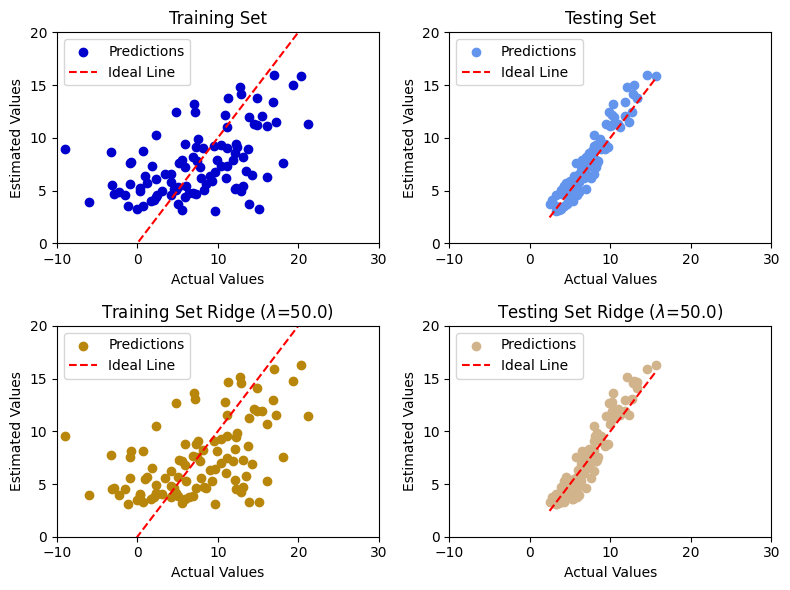

In [63]:
# plot predictions versus ground truth
plt.figure(figsize=(8, 6));

# training set Linear
plt.subplot(2, 2, 1)
plt.scatter(y, y_train_pred, color='mediumblue', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Line')
plt.xlim(-10, 30)
plt.ylim(0, 20)
plt.xlabel('Actual Values')
plt.ylabel('Estimated Values')
plt.title('Training Set')
plt.legend()


# testing set Linear
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_test_pred, color='cornflowerblue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
plt.xlim(-10, 30)
plt.ylim(0, 20)
plt.xlabel('Actual Values')
plt.ylabel('Estimated Values')
plt.title('Testing Set')
plt.legend()


# training set Ridge
plt.subplot(2, 2, 3)
plt.scatter(y, y_train_pred_ridge, color='darkgoldenrod', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Line')
plt.xlim(-10, 30)
plt.ylim(0, 20)
plt.xlabel('Actual Values')
plt.ylabel('Estimated Values')
plt.title(f'Training Set Ridge ($\lambda$={reg})')
plt.legend()


# testing set Ridge
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_test_pred_ridge, color='tan', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
plt.xlim(-10, 30)
plt.ylim(0, 20)
plt.xlabel('Actual Values')
plt.ylabel('Estimated Values')
plt.title(f'Testing Set Ridge ($\lambda$={reg})')
plt.legend()


plt.tight_layout()
plt.show()

e) **Would you select the Linear model or the Ridge model for deploying the solution to a potential customer?** Explain your answer.

We would select the Linear model over the Ridge model.

Based on the MSE, the Linear model had a lower value in both the training and test settings. This means that the Linear model fits the training data slightly better and generalizes better to the unseen data.

The results for the Ridge model suggest that the regularization weight may be too high, which can lead to underfitting.

_______________________
END of assignment!

In [97]:
%cd /content/drive/My Drive/Colab_Notebooks/ML_Assign1_Data
!jupyter nbconvert --to html Assignment1_students.ipynb

/content/drive/My Drive/Colab_Notebooks/ML_Assign1_Data
[NbConvertApp] Converting notebook Assignment1_students.ipynb to html
[NbConvertApp] Writing 828561 bytes to Assignment1_students.html
